In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [210]:
df = pd.read_csv('data_2022.csv', encoding='latin-1')

In [211]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.9,$78.7,-5.0,1.0,"$2,390",11.7,5.6,13.0,7.8
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,$40.7,-3.5,2.0,"$14,218",11.7,1.6,"1,107.0",76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,$491.5,-6.0,0.1,"$11,112",12.8,2.4,"1,125.0",53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,$215.1,-4.0,-1.9,"$6,932",7.7,22.3,"-1,866.0",127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,$941.8,-10.0,-2.8,"$20,751",11.7,42.0,"4,123.0",103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183.0,Zimbabwe,Zimbabwe,Sub-Saharan Africa,173.0,46.0,33.1,20.8,16.3,20.6,...,Zimbabwe,14.9,$39.8,-8.0,-1.3,"$2,622",5.7,557.2,194.0,88.9
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.9,$78.7,-5.0,1.0,"$2,390",11.7,5.6,13.0,7.8
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,$40.7,-3.5,2.0,"$14,218",11.7,1.6,"1,107.0",76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,$491.5,-6.0,0.1,"$11,112",12.8,2.4,"1,125.0",53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,$215.1,-4.0,-1.9,"$6,932",7.7,22.3,"-1,866.0",127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,$941.8,-10.0,-2.8,"$20,751",11.7,42.0,"4,123.0",103.0


In [213]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    184 non-null    float64
 1   Country Name                 184 non-null    object 
 2   WEBNAME                      184 non-null    object 
 3   Region                       184 non-null    object 
 4   World Rank                   177 non-null    float64
 5   Region Rank                  177 non-null    float64
 6   2022 Score                   177 non-null    float64
 7   Property Rights              177 non-null    float64
 8   Judical Effectiveness        177 non-null    float64
 9   Government Integrity         177 non-null    float64
 10  Tax Burden                   177 non-null    float64
 11  Gov't Spending               177 non-null    float64
 12  Fiscal Health                177 non-null    float64
 13  Business Freedom    

In [214]:
df.describe()

,CountryID,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),GDP Growth Rate (%),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP)
count,184.000000,177.000000,177.000000,177.00000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,182.000000,182.000000,178.000000,177.000000,184.000000,183.000000,183.000000,180.000000,179.000000,181.000000
mean,93.586957,89.000000,20.203390,59.99887,55.286441,50.233333,45.348023,77.884434,65.036723,60.589831,...,28.438187,23.253846,20.667978,32.542373,41.972489,-4.891257,1.426316,7.982222,21.577095,69.244751
std,54.103352,51.239633,12.582157,11.61444,23.938589,26.824001,22.212039,13.377893,24.517711,32.574563,...,13.472757,8.504562,10.374504,13.490816,149.685176,7.783487,3.164639,5.236850,180.798045,44.443688
min,1.000000,1.000000,1.000000,3.00000,0.200000,3.900000,3.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,10.100000,0.038000,-59.700000,-23.500000,0.300000,-2.700000,2.900000
25%,46.750000,45.000000,9.000000,53.30000,37.400000,29.200000,29.400000,71.600000,53.500000,36.700000,...,20.000000,19.250000,13.225000,22.800000,2.575000,-7.500000,-0.100000,4.400000,0.550000,42.800000
50%,93.500000,89.000000,19.000000,59.80000,50.400000,45.800000,41.000000,78.900000,70.200000,70.800000,...,30.000000,25.000000,18.500000,31.500000,9.800000,-4.100000,1.500000,6.600000,2.500000,60.700000
75%,140.250000,133.000000,30.000000,67.60000,74.200000,74.300000,60.000000,86.900000,84.400000,88.300000,...,36.750000,30.000000,28.325000,39.400000,31.150000,-1.150000,2.950000,10.225000,4.950000,84.400000
max,186.000000,177.000000,47.000000,84.40000,100.000000,98.000000,99.500000,100.000000,97.000000,99.700000,...,60.000000,50.000000,46.300000,119.100000,1402.100000,43.400000,12.100000,28.700000,2355.100000,304.100000


In [215]:
df.dtypes

CountryID                      float64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2022 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Unnamed: 20                     object
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Unnamed: 24                     object
Gov't Expenditure % of GD

In [216]:
#checking missing values
df.isnull().sum()

CountryID                       4
Country Name                    4
WEBNAME                         4
Region                          4
World Rank                     11
Region Rank                    11
2022 Score                     11
Property Rights                11
Judical Effectiveness          11
Government Integrity           11
Tax Burden                     11
Gov't Spending                 11
Fiscal Health                  11
Business Freedom               11
Labor Freedom                  11
Monetary Freedom               11
Trade Freedom                  11
Investment Freedom             11
Financial Freedom              11
Tariff Rate (%)                12
Unnamed: 20                     4
Income Tax Rate (%)             6
Corporate Tax Rate (%)          6
Tax Burden % of GDP            10
Unnamed: 24                     4
Gov't Expenditure % of GDP     11
Country                         4
Unnamed: 27                     4
Population (Millions)           4
GDP (Billions,

In [217]:
#checking data for Afghanistan
df.iloc[0]

CountryID                                 1
Country Name                    Afghanistan
WEBNAME                         Afghanistan
Region                         Asia-Pacific
World Rank                              NaN
Region Rank                             NaN
2022 Score                              NaN
Property Rights                         NaN
Judical Effectiveness                   NaN
Government Integrity                    NaN
Tax Burden                              NaN
Gov't Spending                          NaN
Fiscal Health                           NaN
Business Freedom                        NaN
Labor Freedom                           NaN
Monetary Freedom                        NaN
Trade Freedom                           NaN
Investment Freedom                      NaN
Financial Freedom                       NaN
Tariff Rate (%)                         NaN
Unnamed: 20                     Afghanistan
Income Tax Rate (%)                      20
Corporate Tax Rate (%)          

In [218]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2022 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Unnamed: 20', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP', 'Unnamed: 24',
       'Gov't Expenditure % of GDP ', 'Country', 'Unnamed: 27',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [219]:
#checing for countries having no rank
df_null=df[df['World Rank'].isna()]

In [220]:
#df_null=df_null.drop(index=df.index[-4:], 
        #axis=0, 
       # inplace=True)

In [221]:
df_null = df_null.iloc[:-4 , :]

In [222]:
df_null

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.900,$78.7,-5.0,1.0000,"$2,390",11.7,5.6,13.0,7.8
77,77.0,Iraq,Iraq,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Iraq,40.200,$401.4,-10.9,1.2000,"$10,003",13.7,0.6,"-2,896.0",81.2
97,96.0,Libya,Libya,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Libya,6.900,$39.2,-59.7,5.6000,"$5,893",19.4,22.3,18420,11.3
98,97.0,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,...,Liechtenstein,0.038,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN
151,184.0,Somalia,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Somalia,15.900,$13.9,-1.5,1.6958,$925,13.1,NaN,464.0,NaN
159,159.0,Syria,Syria,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Syria,17.500,NaN,-10.5,-1.4000,NaN,9.0,NaN,NaN,52.7
181,181.0,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Yemen,29.800,$62.6,-5.0,-3.3000,"$1,927",13.4,26.2,-371.0,83.2


In [223]:
#country list having no rank
df_null['Country Name']

0        Afghanistan
77              Iraq
97             Libya
98     Liechtenstein
151          Somalia
159            Syria
181            Yemen
Name: Country Name, dtype: object

In [224]:
df_copy=df.copy()

In [225]:
df = df.iloc[:-4 , :]

In [226]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.0,Afghanistan,Afghanistan,Asia-Pacific,NaN,NaN,NaN,NaN,NaN,NaN,...,Afghanistan,38.9,$78.7,-5.0,1.0,"$2,390",11.7,5.6,13.0,7.8
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,$40.7,-3.5,2.0,"$14,218",11.7,1.6,"1,107.0",76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,$491.5,-6.0,0.1,"$11,112",12.8,2.4,"1,125.0",53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,$215.1,-4.0,-1.9,"$6,932",7.7,22.3,"-1,866.0",127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,$941.8,-10.0,-2.8,"$20,751",11.7,42.0,"4,123.0",103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179.0,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,Venezuela,28.4,$144.7,-30.0,-23.5,"$5,178",9.1,2355.1,959.0,304.1
180,180.0,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,Vietnam,97.3,"$1,058.7",2.9,6.1,"$10,869",2.3,3.2,"15,800.0",46.6
181,181.0,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,Yemen,29.8,$62.6,-5.0,-3.3,"$1,927",13.4,26.2,-371.0,83.2
182,182.0,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,Zambia,18.4,$63.1,-3.5,1.9,"$3,342",12.2,16.4,234.0,117.8


In [227]:
#removing null values
df = df.dropna(axis=0)

<AxesSubplot:>

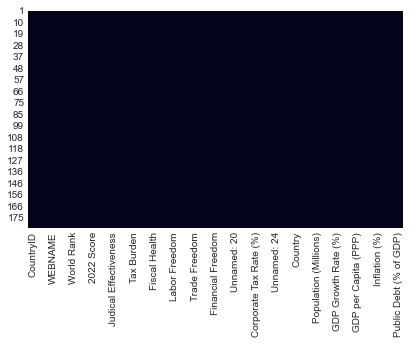

In [228]:
sns.heatmap(df.isnull(), cbar=False)

In [229]:
df.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     0
Region Rank                    0
2022 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Unnamed: 20                    0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Unnamed: 24                    0
Gov't Expenditure % of GDP     0
Country                        0
Unnamed: 27                    0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth

In [230]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Unnamed: 27,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,$40.7,-3.5,2.0,"$14,218",11.7,1.6,"1,107.0",76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,$491.5,-6.0,0.1,"$11,112",12.8,2.4,"1,125.0",53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,$215.1,-4.0,-1.9,"$6,932",7.7,22.3,"-1,866.0",127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,$941.8,-10.0,-2.8,"$20,751",11.7,42.0,"4,123.0",103.0
5,6.0,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,Armenia,3.0,$39.4,-7.6,2.6,"$13,261",20.2,1.2,117.0,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178.0,Vanuatu,Vanuatu,Asia-Pacific,72.0,14.0,62.9,57.8,71.2,42.4,...,Vanuatu,0.3,$0.8,-9.2,1.6,"$2,586",2.0,2.9,30.0,44.2
179,179.0,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,Venezuela,28.4,$144.7,-30.0,-23.5,"$5,178",9.1,2355.1,959.0,304.1
180,180.0,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,Vietnam,97.3,"$1,058.7",2.9,6.1,"$10,869",2.3,3.2,"15,800.0",46.6
182,182.0,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,Zambia,18.4,$63.1,-3.5,1.9,"$3,342",12.2,16.4,234.0,117.8


In [231]:
columnsToChange = ['FDI Inflow (Millions)','GDP per Capita (PPP)', 'GDP (Billions, PPP)', 'Unemployment (%)','Population (Millions)']
for column in columnsToChange:
  data = df[column]
  edited = []
  for row in data:
    noComma = row.replace(',', '')
    noDollar = noComma.replace('$', '')
    edited.append(noDollar)
  df[column] = [x for x in edited]
  df[column] = df[column].astype(float)
    
print(df.info())

D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'float' object has no attribute 'replace'

In [232]:
#columns having object datype
list(df.select_dtypes(['object']).columns)

['Country Name',
 'WEBNAME',
 'Region',
 'Unnamed: 20',
 'Unnamed: 24',
 'Country',
 'Unnamed: 27']

In [233]:
df=df.drop(['Unnamed: 20','Unnamed: 24','Unnamed: 27'], axis=1)

In [234]:
list(df.select_dtypes(['object']).columns)

['Country Name', 'WEBNAME', 'Region', 'Country']

In [235]:
df.dtypes

CountryID                      float64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2022 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

In [236]:
df['FDI Inflow (Millions)']

1       1107.0
2       1125.0
3      -1866.0
4       4123.0
5        117.0
        ...   
178       30.0
179      959.0
180    15800.0
182      234.0
183      194.0
Name: FDI Inflow (Millions), Length: 170, dtype: float64

In [237]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0
5,6.0,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,Armenia,3.0,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178.0,Vanuatu,Vanuatu,Asia-Pacific,72.0,14.0,62.9,57.8,71.2,42.4,...,Vanuatu,0.3,0.8,-9.2,1.6,2586.0,2.0,2.9,30.0,44.2
179,179.0,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,Venezuela,28.4,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1
180,180.0,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,Vietnam,97.3,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6
182,182.0,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,Zambia,18.4,63.1,-3.5,1.9,3342.0,12.2,16.4,234.0,117.8


In [238]:
#renaming few columns
df.rename(columns={'Country Name': 'CountryName', 
                   'Judical Effectiveness': 'Judicial Effectiveness', 
                   'Gov\'t Spending': 'Gov Spending', 
                   'Gov\'t Expenditure % of GDP ': 'Gov Expenditure % of GDP',
                    'Investment Freedom ': 'Investment Freedom'}, inplace=True)

In [239]:
df

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,Albania,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,Algeria,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,Angola,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,Argentina,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0
5,6.0,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,Armenia,3.0,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178.0,Vanuatu,Vanuatu,Asia-Pacific,72.0,14.0,62.9,57.8,71.2,42.4,...,Vanuatu,0.3,0.8,-9.2,1.6,2586.0,2.0,2.9,30.0,44.2
179,179.0,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,Venezuela,28.4,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1
180,180.0,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,Vietnam,97.3,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6
182,182.0,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,Zambia,18.4,63.1,-3.5,1.9,3342.0,12.2,16.4,234.0,117.8


In [240]:
df['World Rank'].max()

176.0

making a category column based on 2022 freedom index score (Thresholding)

In [241]:
bins = [0, 49.9, 59.9, 69.9, 79.9, 100]
names = ['Repressed', 'Mostly_unfree', 'moderately_free', 'mostly_free', 'free']

df['Score Category'] = pd.cut(df['2022 Score'], bins, labels=names)

print(df.dtypes)

CountryID                      float64
CountryName                     object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2022 Score                     float64
Property Rights                float64
Judicial Effectiveness         float64
Government Integrity           float64
Tax Burden                     float64
Gov Spending                   float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov Expenditure % of GDP       float64
Country                         object
Population (Millions)    

In [242]:
df['Score Category'].value_counts()

Mostly_unfree      55
moderately_free    51
Repressed          30
mostly_free        27
free                7
Name: Score Category, dtype: int64

In [243]:
df['Score Category']

1      moderately_free
2            Repressed
3        Mostly_unfree
4        Mostly_unfree
5      moderately_free
            ...       
178    moderately_free
179          Repressed
180    moderately_free
182          Repressed
183          Repressed
Name: Score Category, Length: 170, dtype: category
Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']

In [244]:
df['Score Category'].isnull().sum()

0

In [245]:
df['2022 Score'].max()

84.4

In [246]:
df

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0,moderately_free
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1,Repressed
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1,Mostly_unfree
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0,Mostly_unfree
5,6.0,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,3.0,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8,moderately_free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178.0,Vanuatu,Vanuatu,Asia-Pacific,72.0,14.0,62.9,57.8,71.2,42.4,...,0.3,0.8,-9.2,1.6,2586.0,2.0,2.9,30.0,44.2,moderately_free
179,179.0,Venezuela,Venezuela,Americas,176.0,32.0,24.8,0.2,4.6,7.1,...,28.4,144.7,-30.0,-23.5,5178.0,9.1,2355.1,959.0,304.1,Repressed
180,180.0,Vietnam,Vietnam,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,...,97.3,1058.7,2.9,6.1,10869.0,2.3,3.2,15800.0,46.6,moderately_free
182,182.0,Zambia,Zambia,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,...,18.4,63.1,-3.5,1.9,3342.0,12.2,16.4,234.0,117.8,Repressed


In [247]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

CountryID : [  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22. 186.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  43.
  44.  45.  46.  48.  49.  50.  51.  52.  53.  54. 156.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  72.
  73.  74.  75.  76.  78.  79.  80.  81.  82.  83.  84.  85.  88.  89.
  90.  91.  92.  93.  94.  95.  98.  99. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135.
 136. 137. 138. 139. 140. 141. 142. 143. 144. 146. 147. 148. 149. 150.
 151. 152. 153. 154. 155. 157. 158. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 182. 183.]
CountryName : ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'B

In [248]:
categorical_val

['Region', 'Financial Freedom', 'Score Category']

In [249]:
df['GDP per Capita (PPP)'].unique()

array([ 14218.,  11112.,   6932.,  20751.,  13261.,  51680.,  55218.,
        14431.,  33148.,  48766.,   5307.,  13553.,  20187.,  51096.,
         6046.,   3437.,  12060.,   8344.,  15047.,  16893.,  14916.,
        62371.,  23817.,   2262.,   5242.,    760.,   4695.,   3646.,
        48720.,   6424.,    979.,   1611.,  23366.,  17192.,  14324.,
         3048.,   1106.,   4188.,  19990.,   5365.,  27717.,  40107.,
        40618.,  58933.,   5096.,  18608.,  11009.,  12790.,   8422.,
        17788.,   1821.,  37745.,   8957.,   2908.,  11567.,  49853.,
        46062.,  15970.,   2275.,  14918.,  54076.,   5693.,  28748.,
         8293.,   2604.,   2348.,  19684.,   2916.,   5450.,  33030.,
        55966.,   6461.,  12222.,  13073.,  94392.,  40547.,  40861.,
         9975.,  42248.,  10306.,  26565.,   4926.,  44621.,  41627.,
         5036.,   8111.,  31509.,  11564.,   2718.,   1557.,  38824.,
       118002.,  16712.,   1599.,    993.,  27402.,  19609.,   2401.,
        42856.,   58

In [250]:
continous_val

['CountryID',
 'CountryName',
 'WEBNAME',
 'World Rank',
 'Region Rank',
 '2022 Score',
 'Property Rights',
 'Judicial Effectiveness',
 'Government Integrity',
 'Tax Burden',
 'Gov Spending',
 'Fiscal Health',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 'Gov Expenditure % of GDP',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [251]:
for i in ['CountryID','CountryName','WEBNAME']:
    categorical_val.append(i)

In [252]:
categorical_val

['Region',
 'Financial Freedom',
 'Score Category',
 'CountryID',
 'CountryName',
 'WEBNAME']

In [253]:
for i in ['CountryID','CountryName','WEBNAME']:
    continous_val.remove(i)

In [254]:
continous_val

['World Rank',
 'Region Rank',
 '2022 Score',
 'Property Rights',
 'Judicial Effectiveness',
 'Government Integrity',
 'Tax Burden',
 'Gov Spending',
 'Fiscal Health',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 'Gov Expenditure % of GDP',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [255]:
df['Score Category'].unique()

['moderately_free', 'Repressed', 'Mostly_unfree', 'mostly_free', 'free']
Categories (5, object): ['Repressed' < 'Mostly_unfree' < 'moderately_free' < 'mostly_free' < 'free']

In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
le = LabelEncoder()
le.fit_transform

<bound method LabelEncoder.fit_transform of LabelEncoder()>

In [258]:
category_map = {'free':1,
               'mostly_free':2,
               'moderately_free':3,
               'Mostly_unfree':4,
               'Repressed':5
}

df['Score Category'] = df['Score Category'].map(category_map)

In [259]:
df['Score Category']

1      3
2      5
3      4
4      4
5      3
      ..
178    3
179    5
180    3
182    5
183    5
Name: Score Category, Length: 170, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

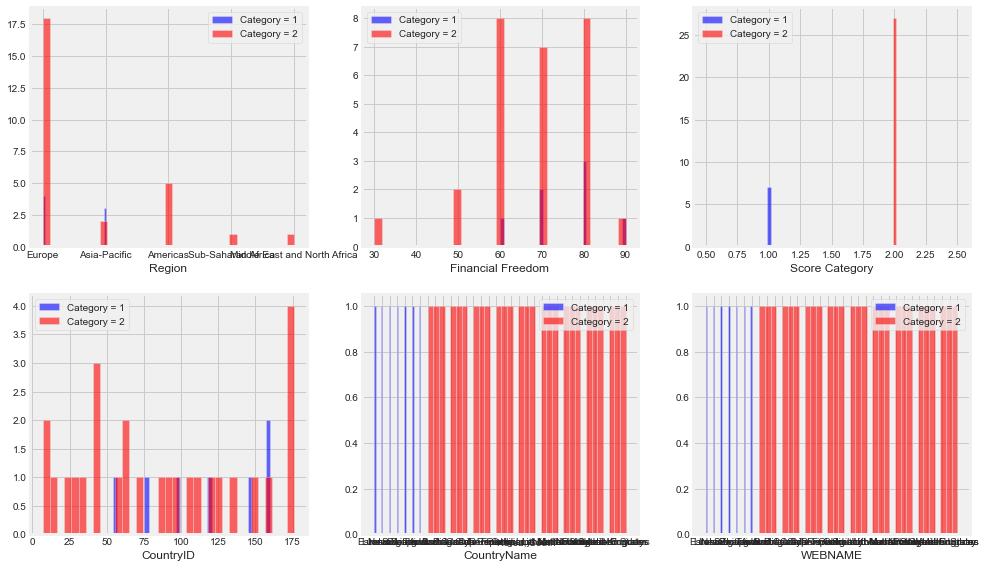

In [260]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Score Category"] == 1][column].hist(bins=35, color='blue', label='Category = 1', alpha=0.6)
    df[df["Score Category"] == 2][column].hist(bins=35, color='red', label='Category = 2', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [261]:
df.head()

,CountryID,CountryName,WEBNAME,Region,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category
1,2.0,Albania,Albania,Europe,50.0,30.0,66.6,55.5,49.8,35.6,...,2.8,40.7,-3.5,2.0,14218.0,11.7,1.6,1107.0,76.0,3
2,3.0,Algeria,Algeria,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,...,43.9,491.5,-6.0,0.1,11112.0,12.8,2.4,1125.0,53.1,5
3,4.0,Angola,Angola,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,...,32.9,215.1,-4.0,-1.9,6932.0,7.7,22.3,-1866.0,127.1,4
4,5.0,Argentina,Argentina,Americas,144.0,27.0,50.1,35.1,57.9,45.1,...,45.4,941.8,-10.0,-2.8,20751.0,11.7,42.0,4123.0,103.0,4
5,6.0,Armenia,Armenia,Europe,58.0,34.0,65.3,50.4,33.1,50.8,...,3.0,39.4,-7.6,2.6,13261.0,20.2,1.2,117.0,62.8,3


In [262]:
df=df.drop(['CountryID','CountryName','WEBNAME'], axis=1)

In [263]:
df.columns

Index(['Region', 'World Rank', 'Region Rank', '2022 Score', 'Property Rights',
       'Judicial Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Score Category'],
      dtype='object')

In [264]:
df['Region'] = df['Region'].astype('category')

In [265]:
df=df.drop('Country', axis=1)

In [266]:
df.dtypes

Region                        category
World Rank                     float64
Region Rank                    float64
2022 Score                     float64
Property Rights                float64
Judicial Effectiveness         float64
Government Integrity           float64
Tax Burden                     float64
Gov Spending                   float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov Expenditure % of GDP       float64
Population (Millions)          float64
GDP (Billions, PPP)            float64
GDP Growth Rate (%)            float64
5 Year GDP Growth Rate (%)     float64
GDP per Capita (PPP)     

In [267]:
dummies = pd.get_dummies(df['Region'])
dummies

,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,1,0,0
...,...,...,...,...,...
178,0,1,0,0,0
179,1,0,0,0,0
180,0,1,0,0,0
182,0,0,0,0,1


In [268]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Region,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov Spending,Fiscal Health,...,Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
1,Europe,50.0,30.0,66.6,55.5,49.8,35.6,89.1,72.1,70.6,...,11.7,1.6,1107.0,76.0,3,0,0,1,0,0
2,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,67.2,57.1,38.6,...,12.8,2.4,1125.0,53.1,5,0,0,0,1,0
3,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,86.6,86.4,80.0,...,7.7,22.3,-1866.0,127.1,4,0,0,0,0,1
4,Americas,144.0,27.0,50.1,35.1,57.9,45.1,73.3,53.0,16.8,...,11.7,42.0,4123.0,103.0,4,1,0,0,0,0
5,Europe,58.0,34.0,65.3,50.4,33.1,50.8,86.9,78.9,75.5,...,20.2,1.2,117.0,62.8,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Asia-Pacific,72.0,14.0,62.9,57.8,71.2,42.4,96.8,60.1,96.1,...,2.0,2.9,30.0,44.2,3,0,1,0,0,0
179,Americas,176.0,32.0,24.8,0.2,4.6,7.1,74.1,78.3,0.0,...,9.1,2355.1,959.0,304.1,5,1,0,0,0,0
180,Asia-Pacific,84.0,18.0,60.6,49.6,33.8,33.6,80.9,85.5,78.8,...,2.3,3.2,15800.0,46.6,3,0,1,0,0,0
182,Sub-Saharan Africa,154.0,36.0,48.7,38.3,45.2,30.8,70.9,73.3,0.0,...,12.2,16.4,234.0,117.8,5,0,0,0,0,1


In [269]:
final = merged.drop(["Region"],axis='columns')
final

,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov Spending,Fiscal Health,Business Freedom,...,Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
1,50.0,30.0,66.6,55.5,49.8,35.6,89.1,72.1,70.6,70.7,...,11.7,1.6,1107.0,76.0,3,0,0,1,0,0
2,167.0,13.0,45.8,27.9,29.7,30.1,67.2,57.1,38.6,50.0,...,12.8,2.4,1125.0,53.1,5,0,0,0,1,0
3,139.0,29.0,52.6,39.8,25.3,20.6,86.6,86.4,80.0,37.6,...,7.7,22.3,-1866.0,127.1,4,0,0,0,0,1
4,144.0,27.0,50.1,35.1,57.9,45.1,73.3,53.0,16.8,55.1,...,11.7,42.0,4123.0,103.0,4,1,0,0,0,0
5,58.0,34.0,65.3,50.4,33.1,50.8,86.9,78.9,75.5,64.9,...,20.2,1.2,117.0,62.8,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,72.0,14.0,62.9,57.8,71.2,42.4,96.8,60.1,96.1,49.1,...,2.0,2.9,30.0,44.2,3,0,1,0,0,0
179,176.0,32.0,24.8,0.2,4.6,7.1,74.1,78.3,0.0,30.8,...,9.1,2355.1,959.0,304.1,5,1,0,0,0,0
180,84.0,18.0,60.6,49.6,33.8,33.6,80.9,85.5,78.8,73.6,...,2.3,3.2,15800.0,46.6,3,0,1,0,0,0
182,154.0,36.0,48.7,38.3,45.2,30.8,70.9,73.3,0.0,44.2,...,12.2,16.4,234.0,117.8,5,0,0,0,0,1


In [270]:
df=merged
df.head(3)

,Region,World Rank,Region Rank,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov Spending,Fiscal Health,...,Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
1,Europe,50.0,30.0,66.6,55.5,49.8,35.6,89.1,72.1,70.6,...,11.7,1.6,1107.0,76.0,3,0,0,1,0,0
2,Middle East and North Africa,167.0,13.0,45.8,27.9,29.7,30.1,67.2,57.1,38.6,...,12.8,2.4,1125.0,53.1,5,0,0,0,1,0
3,Sub-Saharan Africa,139.0,29.0,52.6,39.8,25.3,20.6,86.6,86.4,80.0,...,7.7,22.3,-1866.0,127.1,4,0,0,0,0,1


In [271]:
X=df.drop(['World Rank','Region Rank','Score Category'], axis=1)
y=df['Score Category']

In [272]:
X.shape

(170, 33)

In [273]:
y.shape

(170,)

In [274]:
X=X.drop('Region', axis=1)

In [275]:
#from sklearn.feature_selection import chi2
#f_p_values=chi2(X,y)

In [276]:
X.columns[(X < 0).any()]

Index(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

In [277]:
X2=X.copy()

In [278]:
X2=X2.drop(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)','FDI Inflow (Millions)'], axis=1)
X2.head()

,2022 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,...,Population (Millions),"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),Public Debt (% of GDP),Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
1,66.6,55.5,49.8,35.6,89.1,72.1,70.6,70.7,51.1,82.0,...,2.8,40.7,14218.0,11.7,76.0,0,0,1,0,0
2,45.8,27.9,29.7,30.1,67.2,57.1,38.6,50.0,51.5,80.1,...,43.9,491.5,11112.0,12.8,53.1,0,0,0,1,0
3,52.6,39.8,25.3,20.6,86.6,86.4,80.0,37.6,53.9,61.2,...,32.9,215.1,6932.0,7.7,127.1,0,0,0,0,1
4,50.1,35.1,57.9,45.1,73.3,53.0,16.8,55.1,51.0,37.9,...,45.4,941.8,20751.0,11.7,103.0,1,0,0,0,0
5,65.3,50.4,33.1,50.8,86.9,78.9,75.5,64.9,47.2,77.5,...,3.0,39.4,13261.0,20.2,62.8,0,0,1,0,0


In [279]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X2,y)

In [280]:
f_p_values

(array([2.87682960e+02, 1.29736078e+03, 1.56129535e+03, 1.26591369e+03,
        3.25659820e+01, 1.95371762e+02, 3.40638865e+02, 4.96196383e+02,
        8.42771400e+01, 9.30922851e+01, 1.35905376e+02, 6.72979913e+02,
        6.43325393e+02, 2.11626126e+02, 8.17122468e+01, 6.63136413e+01,
        2.44886619e+02, 1.04335374e+02, 1.67089685e+03, 2.67449709e+04,
        2.13772559e+06, 1.53573509e+01, 2.32731618e+02, 3.24994388e+00,
        5.44020897e+00, 3.48449429e+01, 2.25493025e+00, 2.28865466e+01]),
 array([4.91283328e-061, 1.24275855e-279, 0.00000000e+000, 8.17324619e-273,
        1.46556726e-006, 3.71377731e-041, 1.84084375e-072, 4.45343342e-106,
        2.15932158e-017, 2.89989601e-019, 2.12360544e-028, 2.46904802e-144,
        6.49254145e-138, 1.18739433e-044, 7.55387946e-017, 1.36035791e-013,
        8.22269139e-052, 1.17357057e-021, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.01464434e-003, 3.40810448e-049, 5.16902126e-001,
        2.45035366e-001, 4.99878747e-0

In [281]:
p_values=pd.Series(f_p_values[1])
p_values.index=X2.columns
p_values
#p value should be lower and f score should be higher 

2022 Score                       4.912833e-61
Property Rights                 1.242759e-279
Judicial Effectiveness           0.000000e+00
Government Integrity            8.173246e-273
Tax Burden                       1.465567e-06
Gov Spending                     3.713777e-41
Fiscal Health                    1.840844e-72
Business Freedom                4.453433e-106
Labor Freedom                    2.159322e-17
Monetary Freedom                 2.899896e-19
Trade Freedom                    2.123605e-28
Investment Freedom              2.469048e-144
Financial Freedom               6.492541e-138
Tariff Rate (%)                  1.187394e-44
Income Tax Rate (%)              7.553879e-17
Corporate Tax Rate (%)           1.360358e-13
Tax Burden % of GDP              8.222691e-52
Gov Expenditure % of GDP         1.173571e-21
Population (Millions)            0.000000e+00
GDP (Billions, PPP)              0.000000e+00
GDP per Capita (PPP)             0.000000e+00
Unemployment (%)                 4

In [282]:
p_values.sort_index(ascending=False)

Unemployment (%)                 4.014644e-03
Trade Freedom                    2.123605e-28
Tax Burden % of GDP              8.222691e-52
Tax Burden                       1.465567e-06
Tariff Rate (%)                  1.187394e-44
Sub-Saharan Africa               1.334087e-04
Public Debt (% of GDP)           3.408104e-49
Property Rights                 1.242759e-279
Population (Millions)            0.000000e+00
Monetary Freedom                 2.899896e-19
Middle East and North Africa     6.889863e-01
Labor Freedom                    2.159322e-17
Judicial Effectiveness           0.000000e+00
Investment Freedom              2.469048e-144
Income Tax Rate (%)              7.553879e-17
Government Integrity            8.173246e-273
Gov Spending                     3.713777e-41
Gov Expenditure % of GDP         1.173571e-21
GDP per Capita (PPP)             0.000000e+00
GDP (Billions, PPP)              0.000000e+00
Fiscal Health                    1.840844e-72
Financial Freedom               6.

<AxesSubplot:xlabel='value', ylabel='variable'>

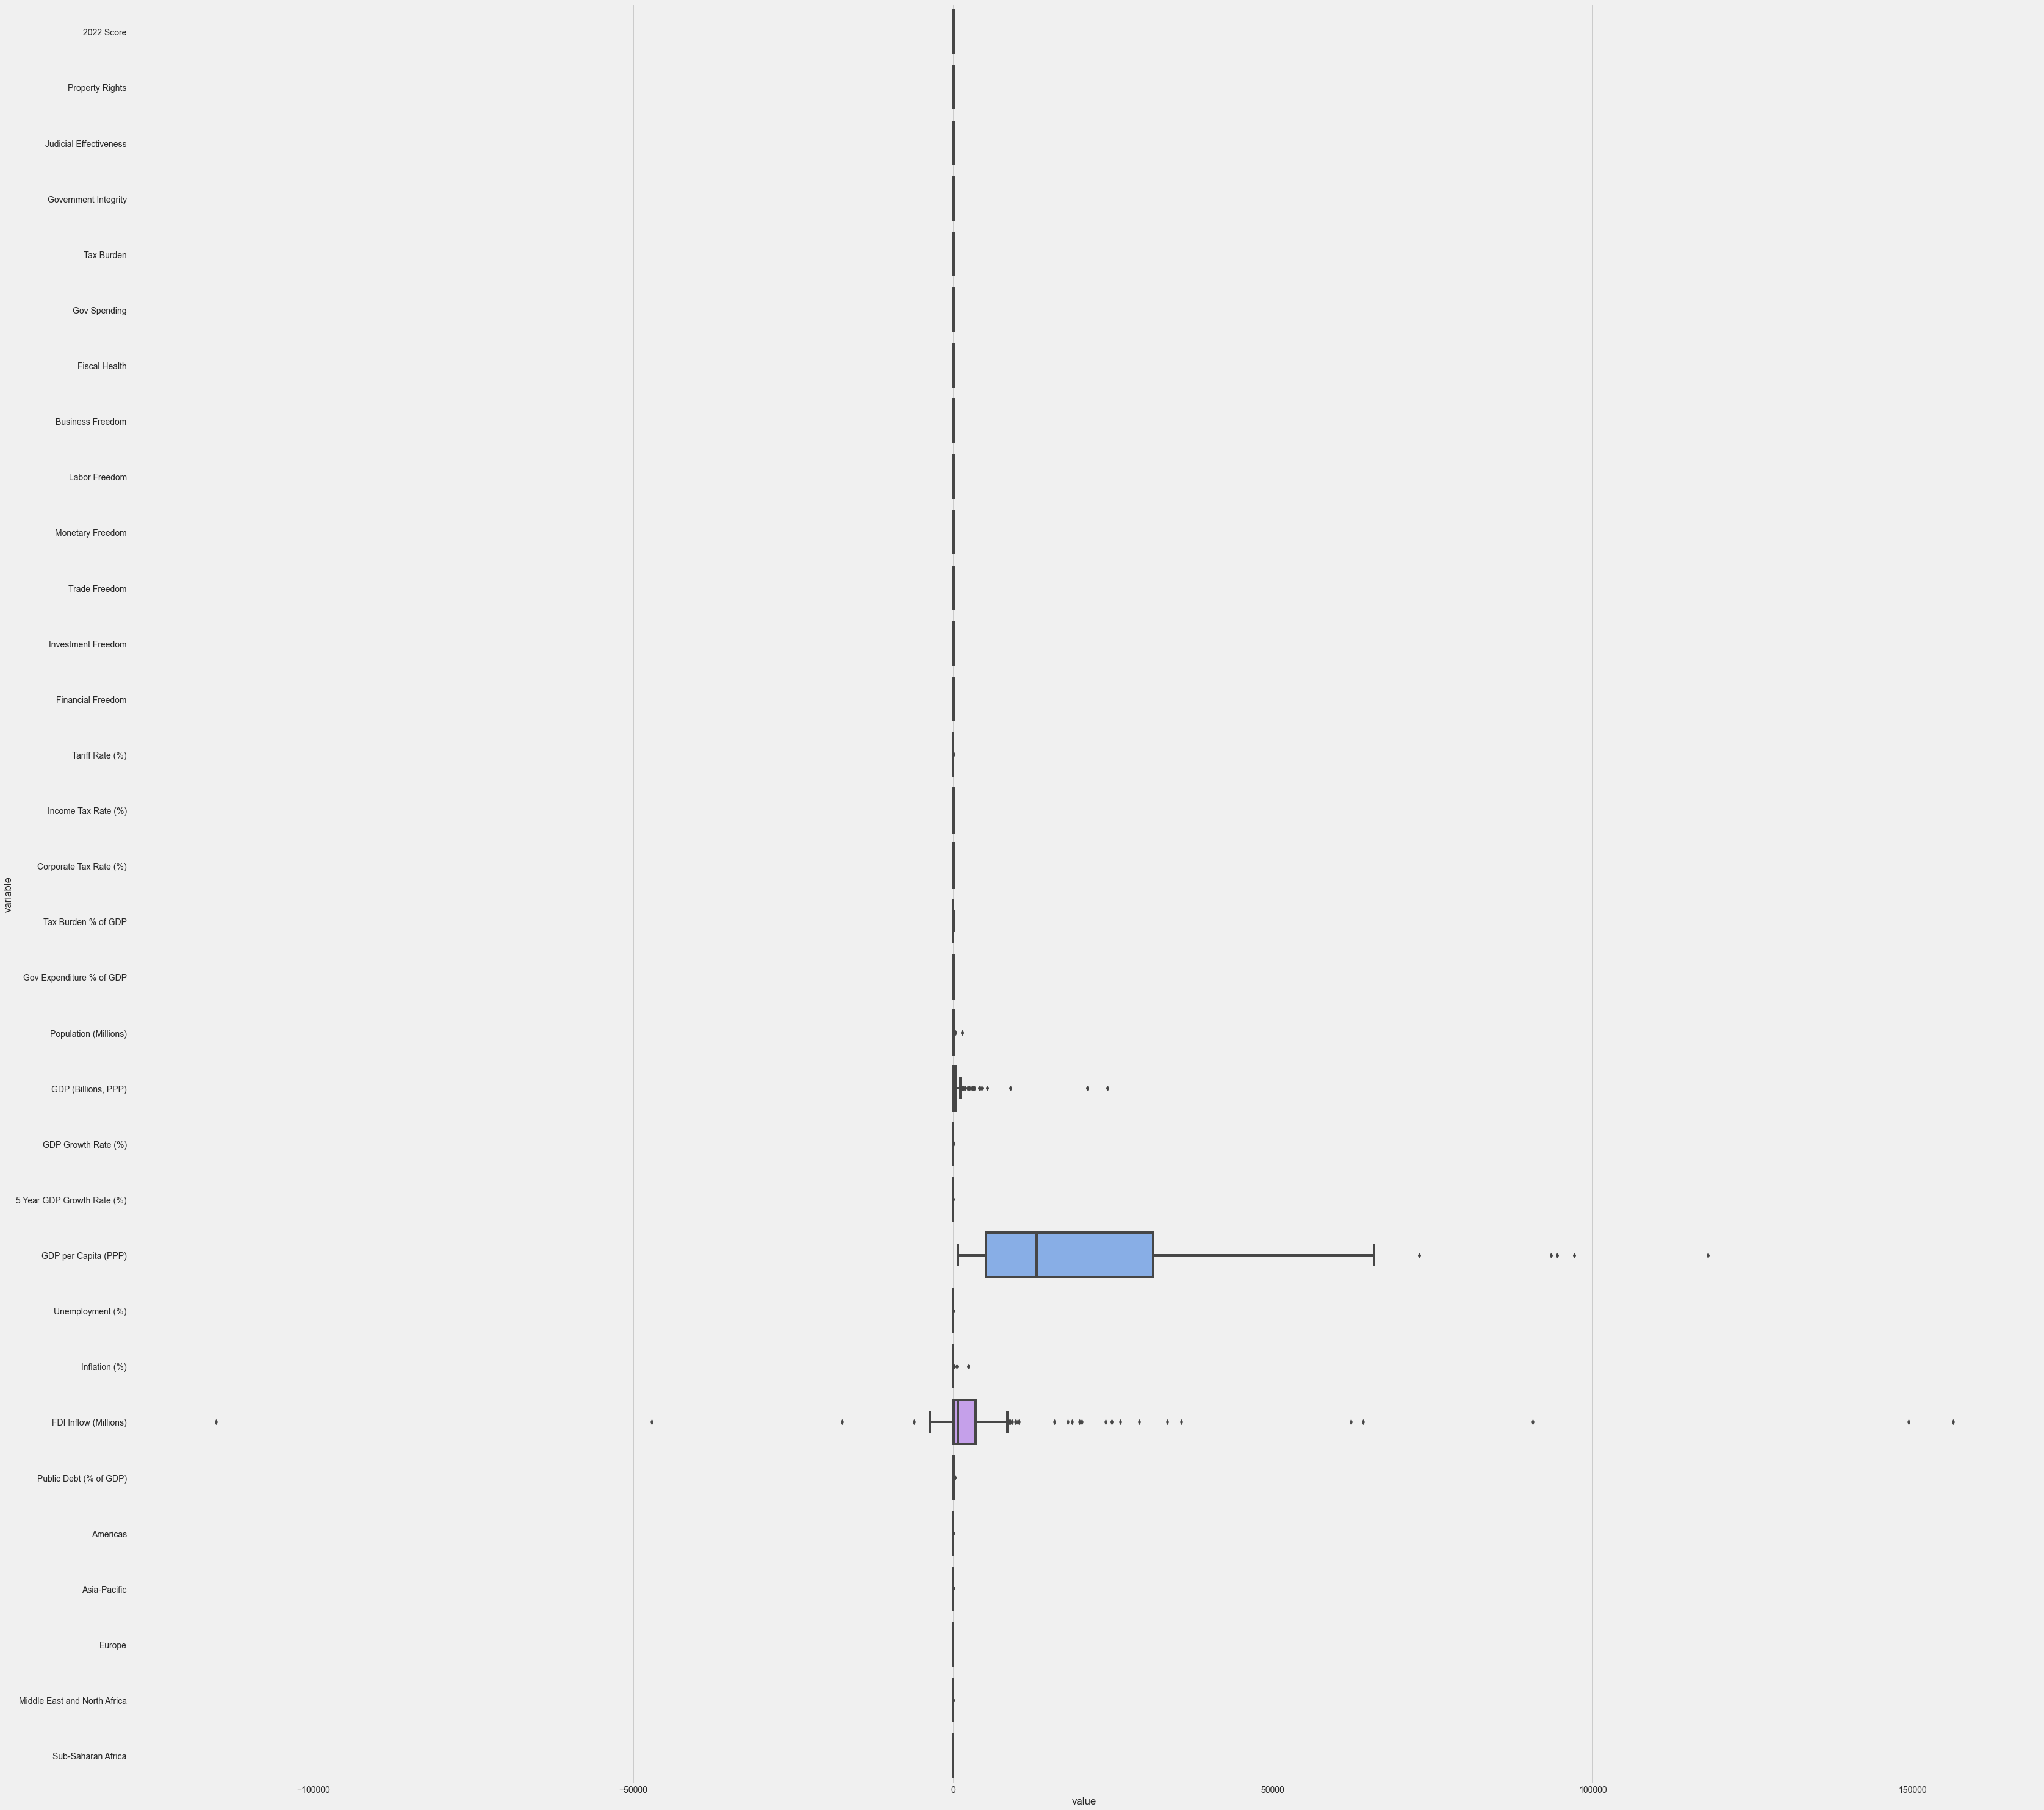

In [283]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots
plt.figure(figsize=(50, 50))
sns.boxplot(x="value", y="variable", data=pd.melt(X))

<AxesSubplot:xlabel='variable', ylabel='value'>

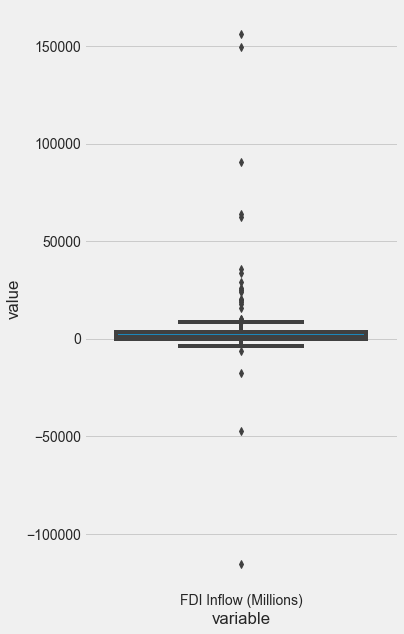

In [284]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

In [286]:
scaler = StandardScaler()
X[['FDI Inflow (Millions)']] = scaler.fit_transform(X[['FDI Inflow (Millions)']])

<AxesSubplot:xlabel='variable', ylabel='value'>

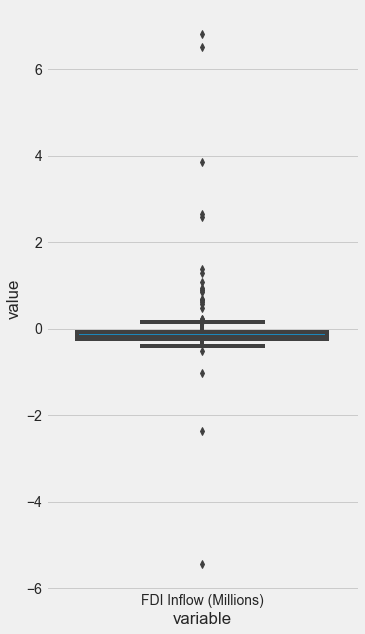

In [287]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

<AxesSubplot:xlabel='variable', ylabel='value'>

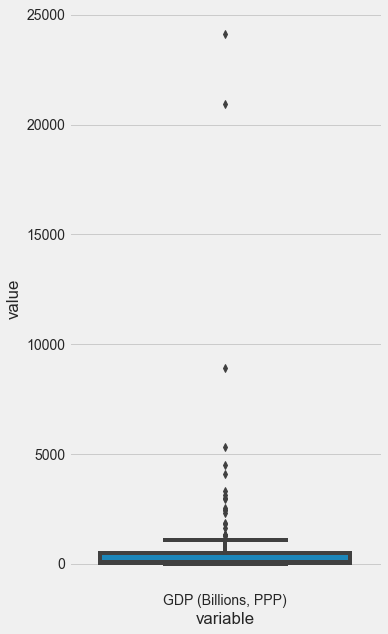

In [288]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [289]:
X['GDP (Billions, PPP)'] = np.log2(X['GDP (Billions, PPP)'])

<AxesSubplot:xlabel='variable', ylabel='value'>

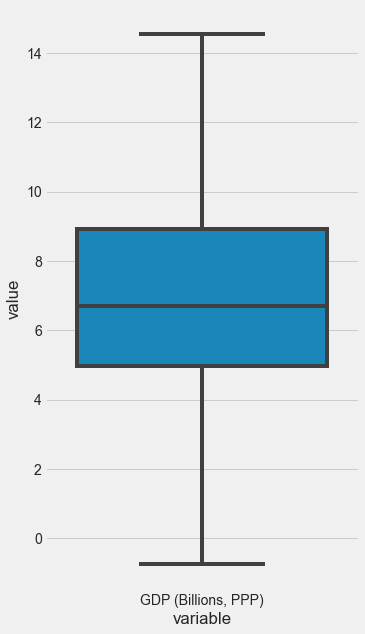

In [290]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [291]:
X.columns

Index(['2022 Score', 'Property Rights', 'Judicial Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov Expenditure % of GDP',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Americas', 'Asia-Pacific', 'Europe',
       'Middle East and North Africa', 'Sub-Saharan Africa'],
      dtype='object')

<AxesSubplot:>

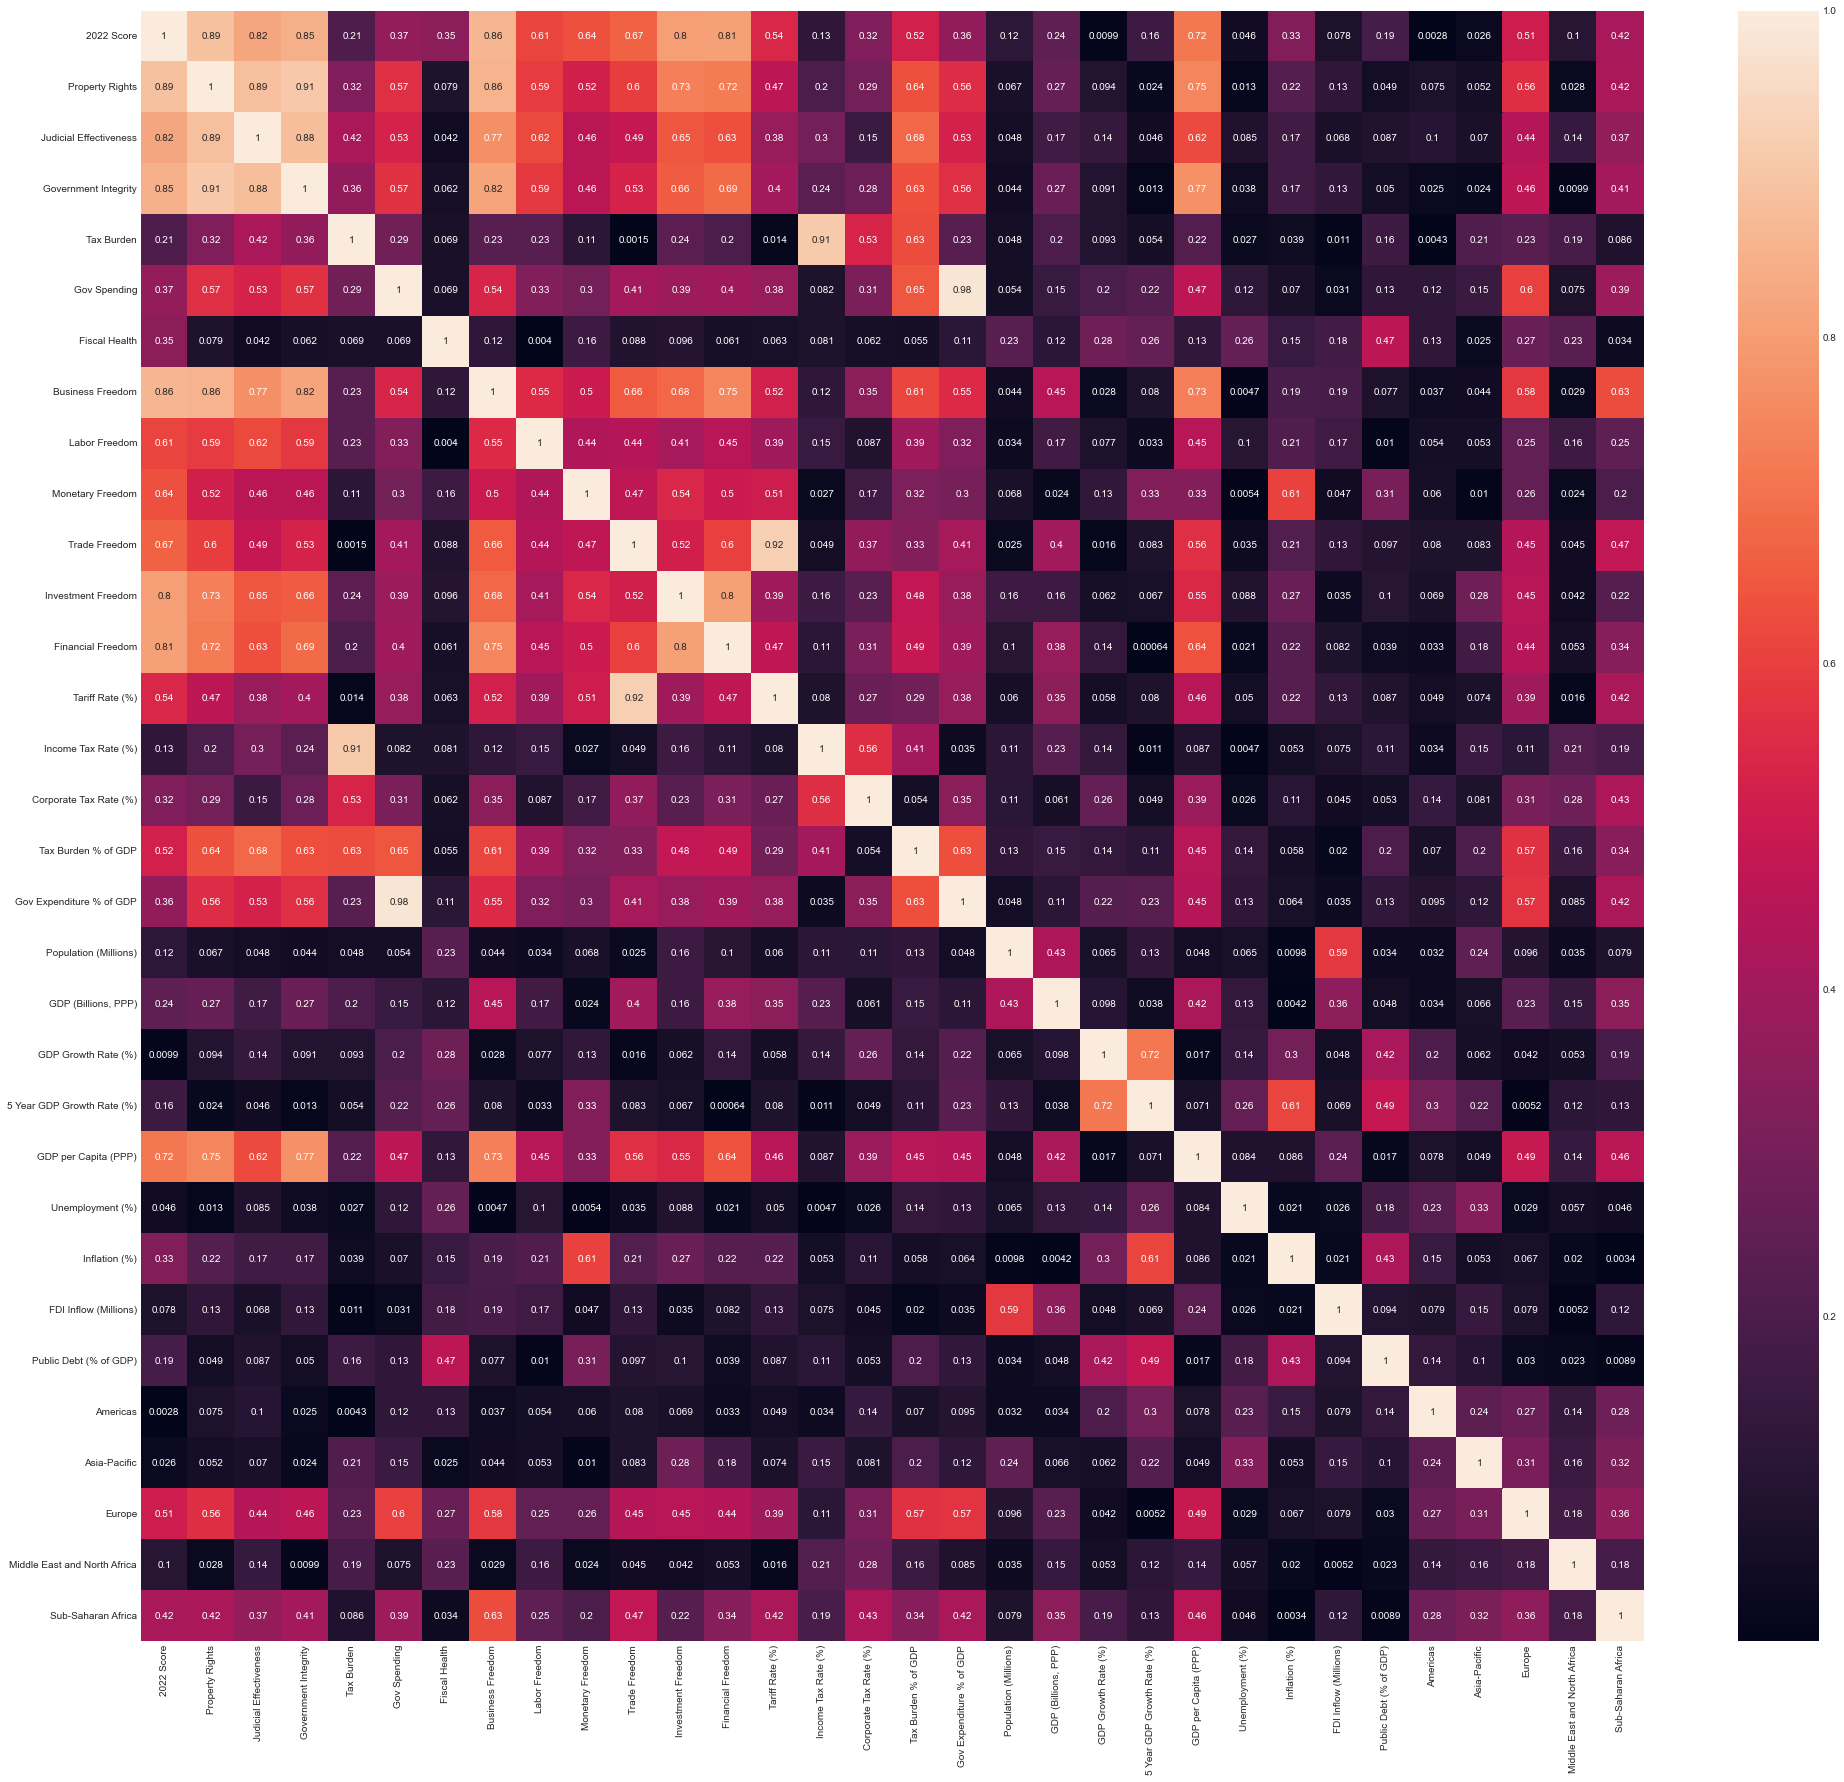

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr().abs(),  annot=True)

In [293]:
X=X.drop(['Financial Freedom','Investment Freedom','2022 Score','GDP per Capita (PPP)','GDP (Billions, PPP)','Tariff Rate (%)'], axis=1)

In [294]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [295]:
corr_features = correlation(X, 0.60)
len(set(corr_features))

11

In [296]:
corr_features

{'5 Year GDP Growth Rate (%)',
 'Business Freedom',
 'Gov Expenditure % of GDP',
 'Government Integrity',
 'Income Tax Rate (%)',
 'Inflation (%)',
 'Judicial Effectiveness',
 'Labor Freedom',
 'Sub-Saharan Africa',
 'Tax Burden % of GDP',
 'Trade Freedom'}

In [297]:
X=X.drop(corr_features,axis=1)   #removing the features

In [298]:
X.shape

(170, 15)

<AxesSubplot:>

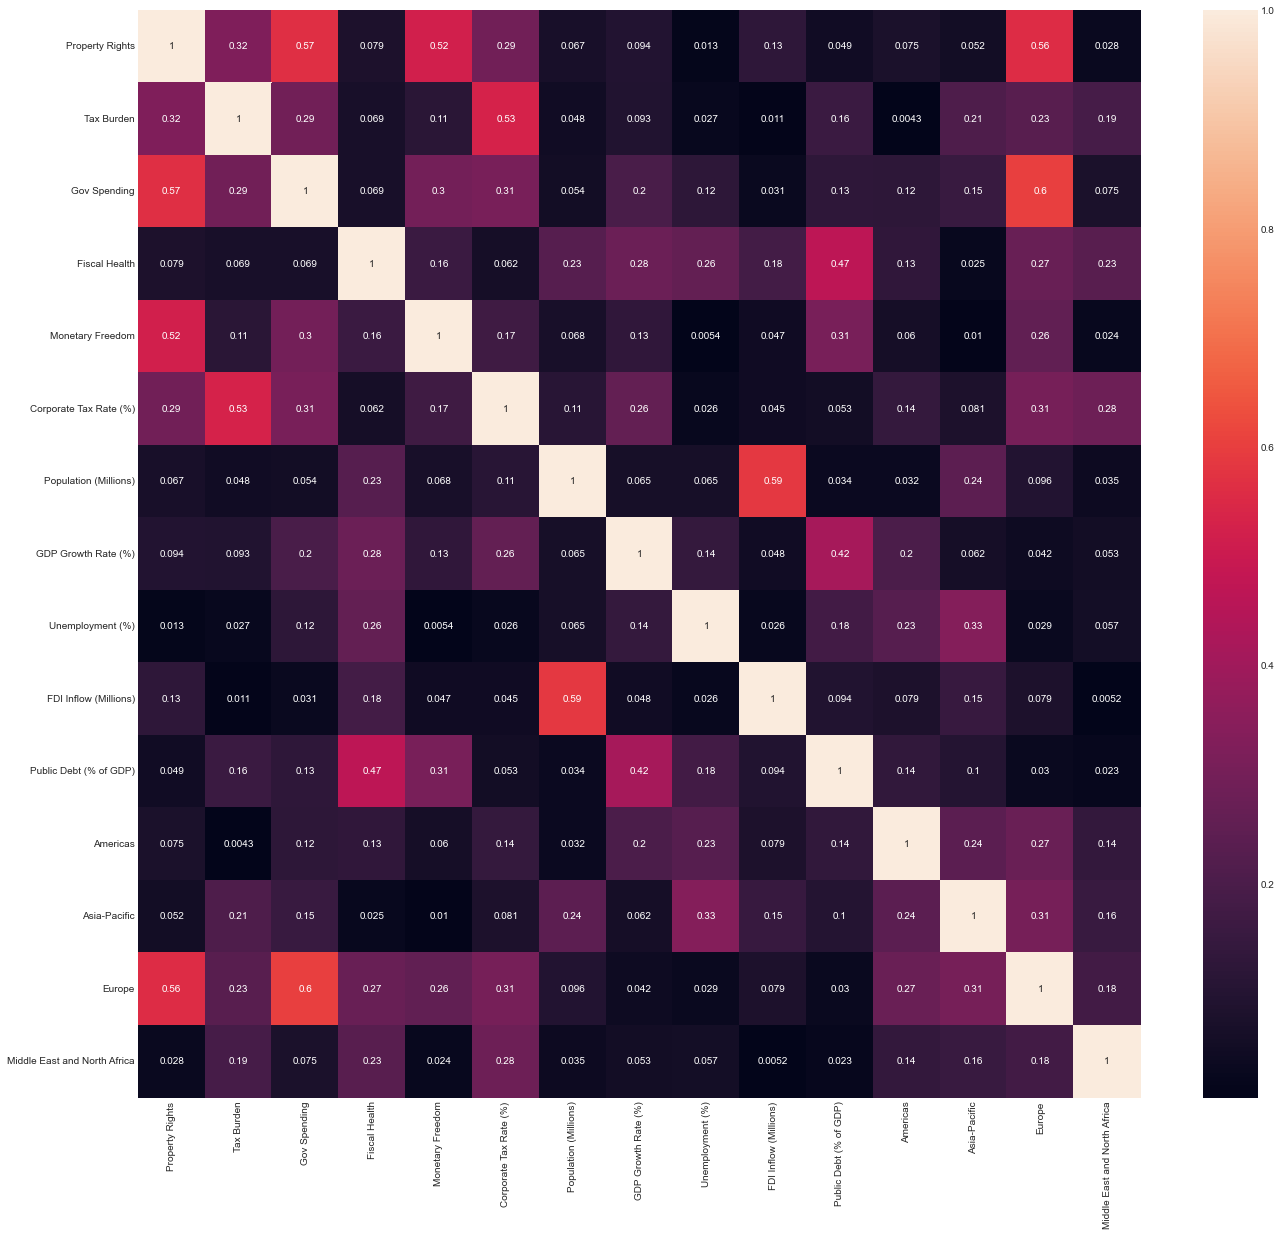

In [299]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

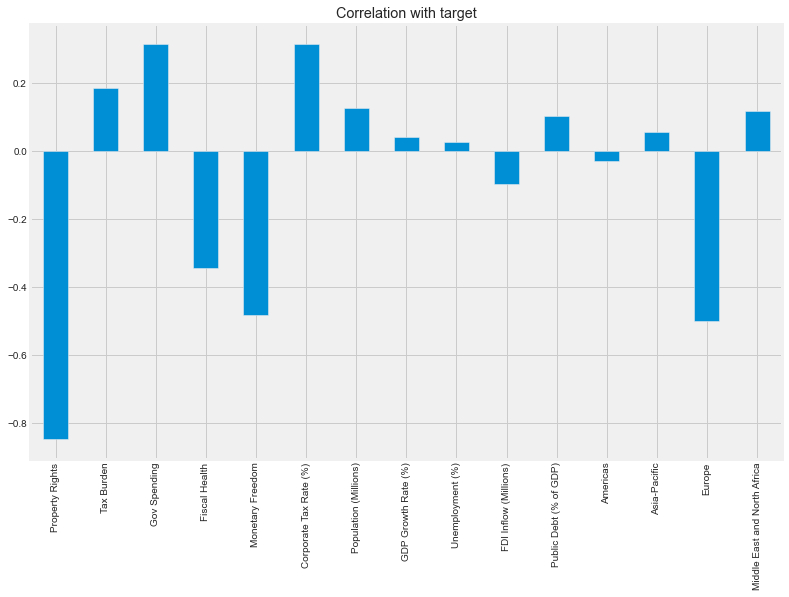

In [300]:
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [301]:
X=X.fillna(X.mean())

In [302]:
X.isnull().sum()

Property Rights                 0
Tax Burden                      0
Gov Spending                    0
Fiscal Health                   0
Monetary Freedom                0
Corporate Tax Rate (%)          0
Population (Millions)           0
GDP Growth Rate (%)             0
Unemployment (%)                0
FDI Inflow (Millions)           0
Public Debt (% of GDP)          0
Americas                        0
Asia-Pacific                    0
Europe                          0
Middle East and North Africa    0
dtype: int64

In [303]:
X.head()

,Property Rights,Tax Burden,Gov Spending,Fiscal Health,Monetary Freedom,Corporate Tax Rate (%),Population (Millions),GDP Growth Rate (%),Unemployment (%),FDI Inflow (Millions),Public Debt (% of GDP),Americas,Asia-Pacific,Europe,Middle East and North Africa
1,55.5,89.1,72.1,70.6,82.0,15.0,2.8,-3.5,11.7,-0.183374,76.0,0,0,1,0
2,27.9,67.2,57.1,38.6,80.1,26.0,43.9,-6.0,12.8,-0.182562,53.1,0,0,0,1
3,39.8,86.6,86.4,80.0,61.2,25.0,32.9,-4.0,7.7,-0.317616,127.1,0,0,0,0
4,35.1,73.3,53.0,16.8,37.9,25.0,45.4,-10.0,11.7,-0.047191,103.0,1,0,0,0
5,50.4,86.9,78.9,75.5,77.5,18.0,3.0,-7.6,20.2,-0.228076,62.8,0,0,1,0


In [304]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100)

In [309]:
model = LogisticRegression()

In [310]:
model.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [311]:
y_pred = model.predict(X_test)

In [312]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set with scaling: {test_accuracy_sklearn}")


Accuracy on testing set with scaling: 0.6029411764705882


In [313]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       0.67      0.50      0.57         4\n           2       0.60      0.30      0.40        10\n           3       0.52      0.79      0.62        19\n           4       0.62      0.71      0.67        21\n           5       0.86      0.43      0.57        14\n\n    accuracy                           0.60        68\n   macro avg       0.65      0.55      0.57        68\nweighted avg       0.64      0.60      0.59        68\n'

In [314]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
#sns.heatmap(cm, annot=True)

array([[ 2,  1,  1,  0,  0],
       [ 0,  3,  7,  0,  0],
       [ 1,  1, 15,  2,  0],
       [ 0,  0,  5, 15,  1],
       [ 0,  0,  1,  7,  6]], dtype=int64)

In [315]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.66666667, 0.6       , 0.51724138, 0.625     , 0.85714286]),
 array([0.5       , 0.3       , 0.78947368, 0.71428571, 0.42857143]),
 array([0.57142857, 0.4       , 0.625     , 0.66666667, 0.57142857]),
 array([ 4, 10, 19, 21, 14], dtype=int64))

In [318]:
#false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)